# 6.2 Exploring Relationships

## Index
1. Libraries
2. Data Set
3. Correlation Matrix Heatmap
4. Scatterplot
5. Pair Plot
6. Categorical Plot
7. Questions
8. Hypothesis

## 01 Libraries

In [4]:
# Importing visualization and analysis libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
matplotlib.__version__

'3.10.0'

## 02 Data Set

In [7]:
# Creating path to the project folder
path=r'/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design'

In [8]:
# Importing cleaned data set
df_clean= pd.read_csv(os.path.join(path,'02 Data','Prepared Data','global_food_wastage_prepared.csv'),index_col = False)

In [9]:
# Taking a look at the column headings
df_clean.head()

,Unnamed: 0,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


In [10]:
# Renaming the Unnamed index colum
df_clean.rename(columns={'Unnamed: 0':'No.'},inplace=True)

In [11]:
df_clean.head()

,No.,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


## 03 Correlation Matrix Heatmap

In [13]:
# Creating a subset excluding the "No.", "Country", "Year" and "Food Category"
sub_corr=df_clean[['Total Waste (Tons)', 'Economic Loss (Million $)','Avg Waste per Capita (Kg)','Population (Million)','Household Waste (%)']]



In [14]:
# Checking the correlation matrix
sub_corr

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,72290.69,71749.94,60.372500,528.202500,59.035000
1,127249.21,128791.57,131.800000,525.782500,37.177500
2,28971.41,25935.06,94.500000,680.020000,54.286667
3,78925.33,87757.40,123.780000,991.535000,62.292500
4,152731.27,156398.00,122.705000,676.595000,53.573333
...,...,...,...,...,...
1101,158942.91,173042.54,104.098750,731.167500,45.780000
1102,124499.76,108874.05,119.752000,704.504000,58.228000
1103,118512.41,116208.37,117.428333,945.853333,49.975000
1104,103268.00,104870.59,105.780000,579.826000,49.530000


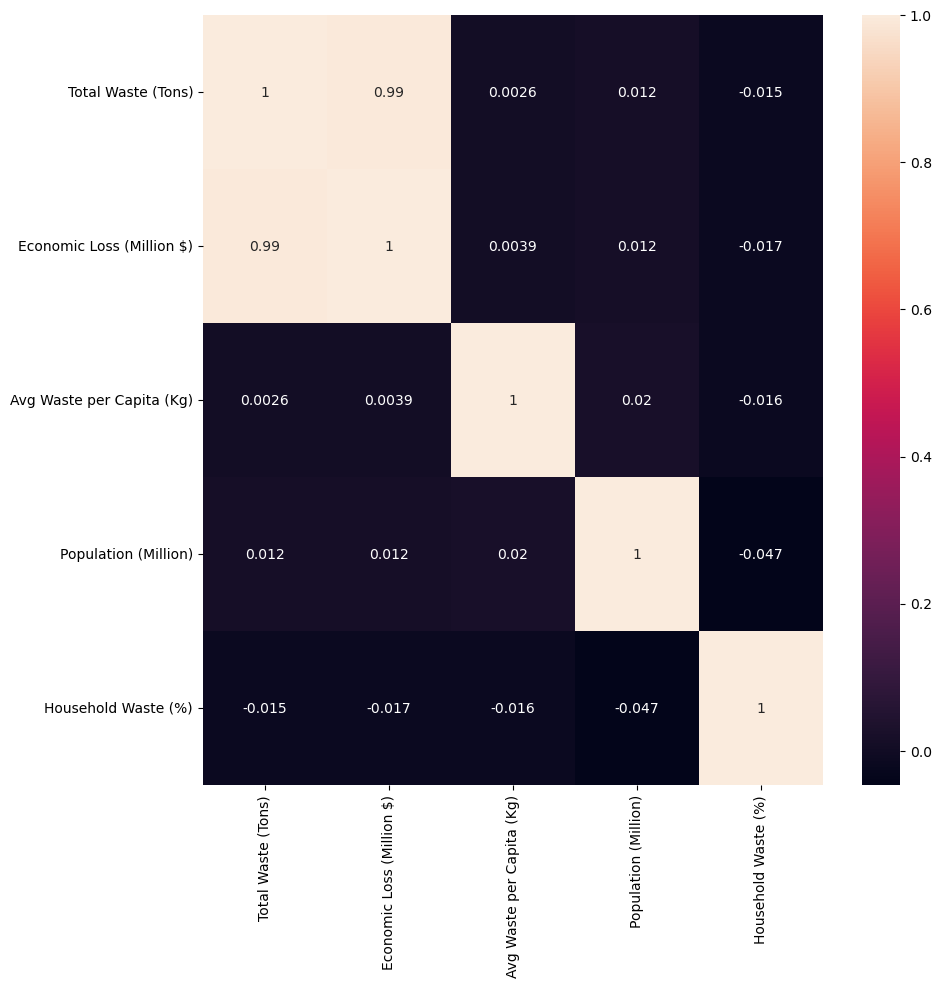

In [15]:
# Now create a subplot with matplotlib
f,ax=plt.subplots(figsize=(10,10))

# And a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplot defined above
corr_heat=sns.heatmap(sub_corr.corr(),annot=True,ax=ax)

### Findings

The correlation matrix heatmap returns a matrix of coefficients that indicate the level of interdependence betwenn the variables: 
* 0: no relationship
* 0.1–0.3: weak relationship
* 0.3–0.5: moderate relationship
* 0.5–1.0: strong relationship
  
We can ignore the diagonal coefficient of 1 as these variables are crossed with itself, which, naturally, will show a perfect positive correlation.

Most of the other variables show very weak to no relationship, while the "Economic Loss (Million $)" and "Total Waste (Tons)" variables show a very strong relationship


In [17]:
# Save figure
plt.savefig('/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/04 Analysis/Visualizations/correlation_heatmap.png',dpi=300, bbox_inches='tight')




<Figure size 640x480 with 0 Axes>

## 04 Scatterplot

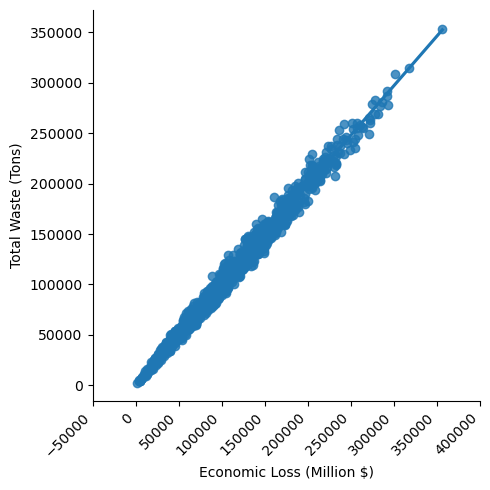

In [19]:
# Creating a scatterplot for the "Economic Loss (Million $)" and "Total Waste (Tons)" columns in seaborn

scatterplot=sns.lmplot(x = 'Economic Loss (Million $)', y = 'Total Waste (Tons)', data = df_clean)
scatterplot.set_xticklabels(rotation=45, ha='right') # rotating x-axis labels to display diagonally
plt.tight_layout() # adjusting layout to prevent cutoff

In [20]:
# Save figure
scatterplot.savefig('/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/04 Analysis/Visualizations/scatterplot.png',dpi=300, bbox_inches='tight')



### Findings:
- The relationship between these 2 variables possesses a very linear trend: as the total waste goes up, so does the economic loss.
- Thus there exists a very strong positive relationship between these 2 variables, and the reasoning is quite self explanatory.
- No outliers detected

## 05 Pair Plot

In [23]:
# Creating a subset of the variables to use in the pair plot
sub_pair=df_clean[['Total Waste (Tons)','Economic Loss (Million $)','Avg Waste per Capita (Kg)','Population (Million)','Household Waste (%)']]



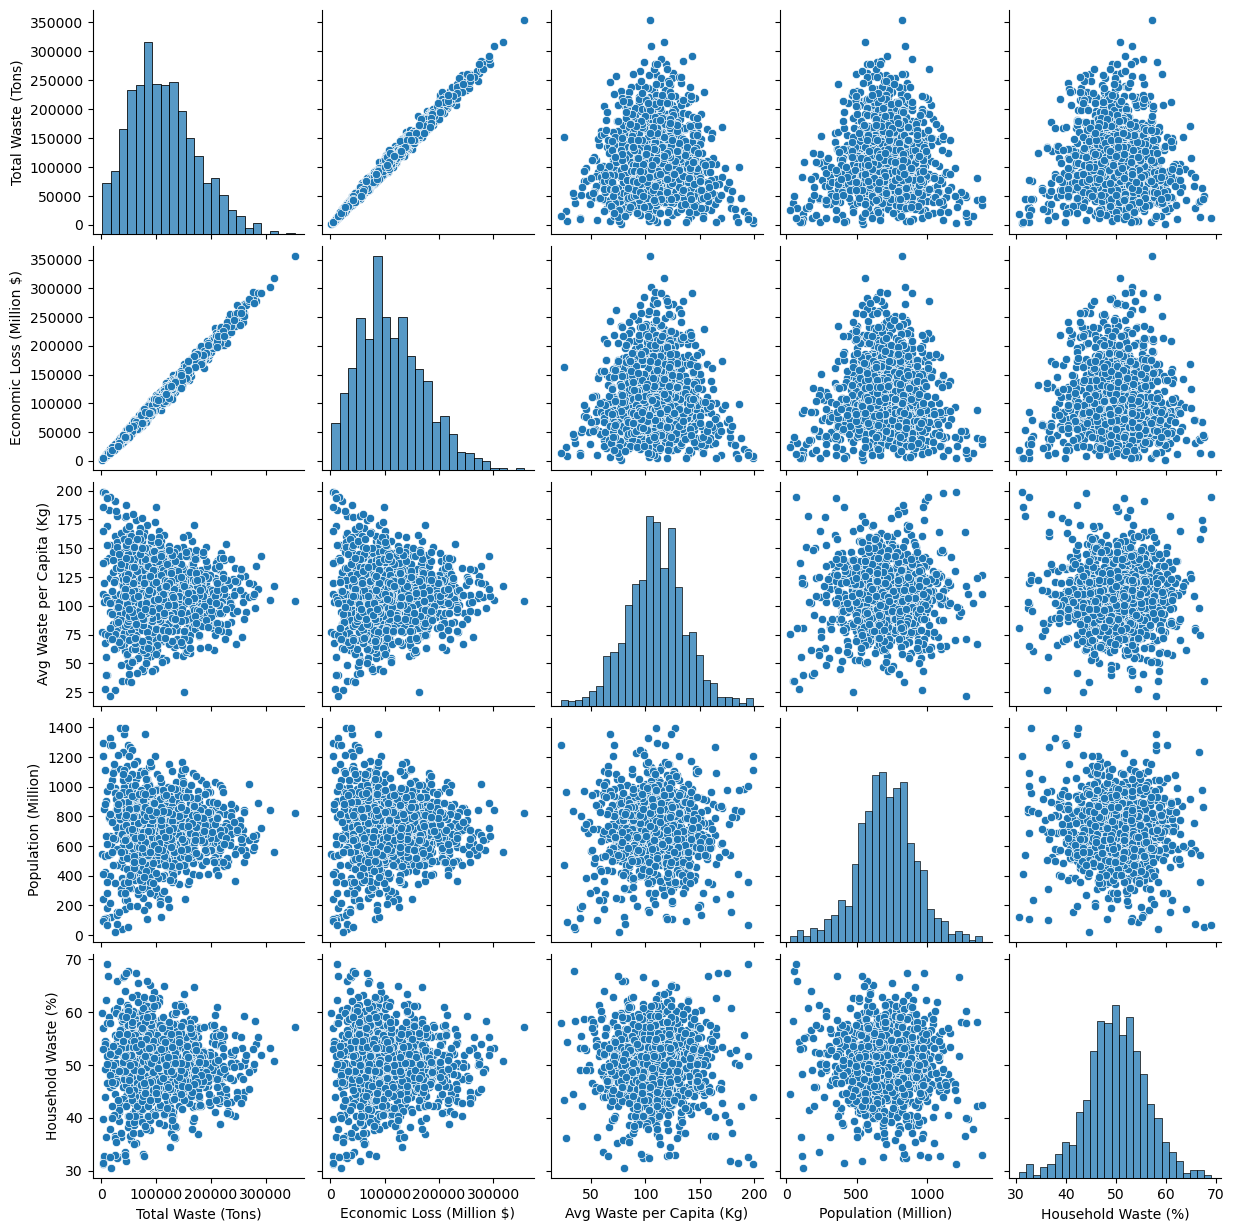

In [24]:
# Now creating a pair plot of the entire data set. 
pairplot= sns.pairplot(sub_pair)

## Findings: 
- Most of the scatter plot charts on the diagram shows a fairly normal bell shaped distribution, indicating that the majority of the data points are concentrated in the mean. 
- Other charts like "average waste" and "household waste" have a round shape in the scatter plot indicating that both variables are focussed in the centre and most of the data points are within the standard deviation. 
- Here again "Economic Loss" compared to "Household Waste" is the only strong correlation in this data set.

### Further variables that need to be explored is: "Household Waste", "Population" and "Avg waste per Capita"


In [26]:
# Saving the figure 
pairplot.savefig('/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/04 Analysis/Visualizations/pairplot.png',dpi=300, bbox_inches='tight')


## 06 Categorical Plot

### Creating a categorical variable the splits "Total Waste (Tons)" into categories and then comparing that agains the "Food Category"

<Axes: xlabel='Total Waste (Tons)', ylabel='Count'>

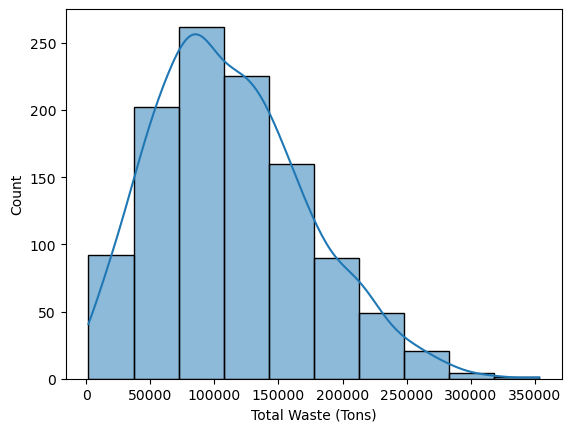

In [29]:
# creating a histogram of the variable: "Total Waste" 
sns.histplot(df_clean['Total Waste (Tons)'],bins=10, kde=True)

In [30]:
# Now creating a new variable: "Waste Category" and defining the categories

In [31]:
df_clean.loc[df_clean['Total Waste (Tons)'] <50000, 'Waste Category'] = 'Low waste'

In [32]:
df_clean.loc[(df_clean['Total Waste (Tons)'] >=50000) & (df_clean['Total Waste (Tons)'] <=200000), 'Waste Category'] = 'Middle waste'

In [33]:
df_clean.loc[df_clean['Total Waste (Tons)'] >200000, 'Waste Category'] = 'High waste'

In [34]:
# Checking the distribution with the value counts
df_clean['Waste Category'].value_counts(dropna=False)

Waste Category
Middle waste    842
Low waste       159
High waste      105
Name: count, dtype: int64

In [35]:
df_clean.columns

Index(['No.', 'Country', 'Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)', 'Waste Category'],
      dtype='object')

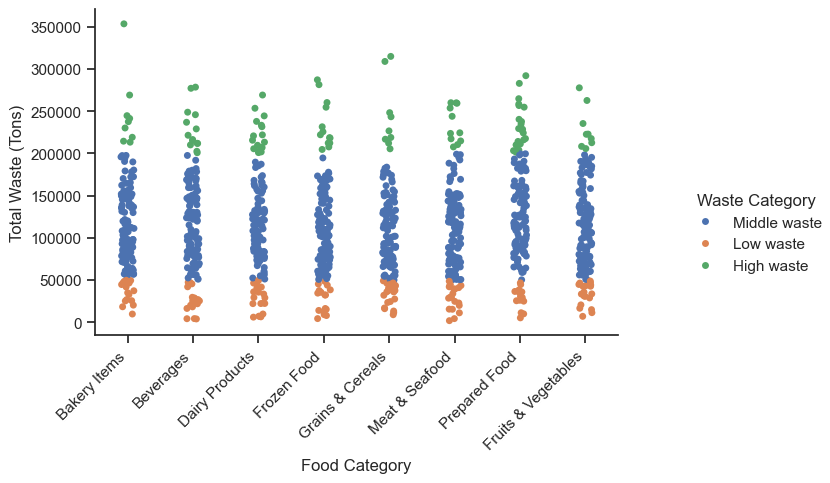

In [36]:
# Now creating a categorical plot in seaborn using the waste categories created above and the "food category"
sns.set(style="ticks")
categorical_plot = sns.catplot(x="Food Category", y="Total Waste (Tons)", hue="Waste Category", data=df_clean)
categorical_plot.set_xticklabels(rotation=45, ha='right') # rotating x-axis labels to display diagonally
categorical_plot._legend.set_bbox_to_anchor((1.05, 0.5)) # and moving the legend to the right
categorical_plot._legend.set_loc('center left')
plt.tight_layout() # adjusting layout to prevent cutoff

### Findings: 
- the waste categories are fairly equally split between each of the food categories.
- The threshold for High waste seems to be at 250000, as there are a few outliers above this point, especially in the Bakery Items and Grains & Cereals.

In [38]:
#saving image
categorical_plot.savefig('/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design/04 Analysis/Visualizations/categorical_plot.png',dpi=300, bbox_inches='tight')



## 07 Questions
- Has food wastage been the same over the years?
- Does food wastage differ between countries?
- Does population have an impact on total food wastage?
- Is there a specific food category that is wasted more than others (in specific countries)?
- Does the amount of food waste per capita differ significantly between high-income and low-income countries?

## 08 Hypothesis
- "Food wastage varies significantly across time, countries, income levels, population sizes, and food categories."